In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#######################################################################
####### Generating the dataset for parity problem
#######################################################################
# Generate all possible input patterns for 4 binary bits
inputs = np.array([[int(x) for x in format(i, '04b')] for i in range(16)])
# Calculate targets based on the parity of the sum of each input pattern where Output is 1 if the sum of the input pattern (number of 1's) is odd, else 0
targets = np.array([[sum(x) % 2] for x in inputs])
inputs, targets

(array([[0, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 0, 1, 0],
        [0, 0, 1, 1],
        [0, 1, 0, 0],
        [0, 1, 0, 1],
        [0, 1, 1, 0],
        [0, 1, 1, 1],
        [1, 0, 0, 0],
        [1, 0, 0, 1],
        [1, 0, 1, 0],
        [1, 0, 1, 1],
        [1, 1, 0, 0],
        [1, 1, 0, 1],
        [1, 1, 1, 0],
        [1, 1, 1, 1]]),
 array([[0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [1],
        [0],
        [1],
        [1],
        [0]]))

In [14]:
#######################################################################
####### Class to create a 2layer MLP 
#######################################################################
#  the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Two-layer perceptron class
class TwoLayerPerceptron:
    def __init__(self, input_size, hidden_size, output_size=1, learning_rate=0.3, momentum_rate=0.9,seed_number=42):
        # Network parametrs
        self.input_size      = input_size
        self.hidden_size     = hidden_size
        self.output_size     = output_size
        self.learning_rate   = learning_rate
        self.momentum_rate   = momentum_rate
        np.random.seed(seed_number)
        # Initialize weights and biases randomly
        self.hidden_weights  = np.random.uniform(-1, 1, [self.input_size +1, self.hidden_size])  # last row is bias
        self.output_weights  = np.random.uniform(-1, 1, [self.hidden_size+1, self.output_size])  # last row is bias
        # Initialize momentum to zero
        self.hidden_momentum = np.zeros_like(self.hidden_weights) # last row is bias
        self.output_momentum = np.zeros_like(self.output_weights) # last row is bias

    # Forward pass
    def forward(self, inputs):
        self.vj = np.atleast_2d(np.hstack((inputs, 1))) @ self.hidden_weights
        self.hidden_output  = sigmoid(self.vj) #sigmoid(vj)
        self.vk = np.atleast_2d(np.hstack((self.hidden_output, np.array([[1]])))) @ self.output_weights
        self.output         = sigmoid(self.vk) #sigmoid(vk)
        return self.output

    # Backward pass (update weights)
    def backward(self, inputs, expected_output):
        # output momentum
        output_error = np.atleast_2d(expected_output) - self.output #ek
        output_delta = output_error * sigmoid_derivative(self.vk)   #deltak=ek*sigmoid'(vk)
        output_grad  = -(output_delta.T@ np.hstack((self.hidden_output, np.array([[1]])))).T
        self.output_momentum = self.momentum_rate * self.output_momentum - self.learning_rate * output_grad
        # hidden momentum
        hidden_error = np.atleast_2d(np.sum(self.output_weights[0:-1,:] * np.tile(output_delta, (self.output_weights[0:-1,:].shape[0], 1)),axis=1))
        hidden_delta = hidden_error * sigmoid_derivative(self.vj) #deltak=hidden_error*sigmoid'(vj)
        hidden_grad = -(hidden_delta.T@ np.atleast_2d(np.hstack((inputs, 1)))).T
        self.hidden_momentum = self.momentum_rate * self.hidden_momentum - self.learning_rate * hidden_grad
        # update wights
        self.output_weights += self.output_momentum
        self.hidden_weights += self.hidden_momentum

In [17]:
#######################################################################
####### function for Training 
#######################################################################
def train(inputs, targets, hidden_size ,learning_rate, momentum_rate):
    # Define network parameters
    input_size    = inputs.shape[1]
    output_size   = targets.shape[1] 
    # Create and train the network
    network = TwoLayerPerceptron(input_size, hidden_size, output_size, learning_rate, momentum_rate)
    tol = 0.05
    training_error = [] # average of errors_epock at each epoch
    epoch = 0
    while True:
        errors_epock = []
        # Training using each sample
        # indices = np.arange(inputs.shape[0])
        # np.random.shuffle(indices)
        
        # # Use the shuffled indices to reorder both inputs and targets
        # shuffled_inputs = inputs[indices]
        # shuffled_targets = targets[indices]
        for i in range(0,inputs.shape[0]):

            x       = inputs[i,:]
            y_tru   = targets[i]  

            # forward pass
            y_pred  = network.forward(x)

            error   = np.abs(y_tru-y_pred)[0][0]
            errors_epock.append(error)

            # back propagation
            network.backward(x, y_tru)
        
        
        training_error.append(sum(errors_epock)/len(errors_epock))
        max_error = max(errors_epock) 
        #print(f'Epoch={epoch} Max error= {max_error} Training error:{sum(errors_epock)/len(errors_epock)}')

        if  max_error<= tol:
            return [training_error, max_error, epoch] 
    
        epoch+=1
    
        

Learning rate: 0.05, Needed epoch (momentum=0): 35772, Needed epoch (momentum=0.9): 3615
Learning rate: 0.1, Needed epoch (momentum=0): 18158, Needed epoch (momentum=0.9): 1850
Learning rate: 0.15000000000000002, Needed epoch (momentum=0): 13567, Needed epoch (momentum=0.9): 2201
Learning rate: 0.2, Needed epoch (momentum=0): 529728, Needed epoch (momentum=0.9): 48298
Learning rate: 0.25, Needed epoch (momentum=0): 133993, Needed epoch (momentum=0.9): 1167
Learning rate: 0.3, Needed epoch (momentum=0): 9343, Needed epoch (momentum=0.9): 1131
Learning rate: 0.35000000000000003, Needed epoch (momentum=0): 8178, Needed epoch (momentum=0.9): 19269
Learning rate: 0.4, Needed epoch (momentum=0): 15610, Needed epoch (momentum=0.9): 4335
Learning rate: 0.45, Needed epoch (momentum=0): 15768, Needed epoch (momentum=0.9): 3876
Learning rate: 0.5, Needed epoch (momentum=0): 602665, Needed epoch (momentum=0.9): 3507


<Figure size 1000x600 with 0 Axes>

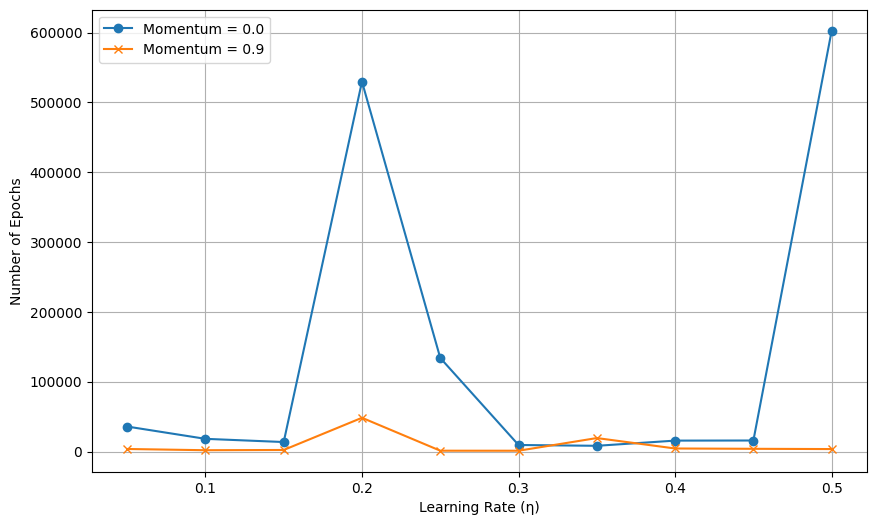

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming the 'train' function and 'inputs', 'targets' are defined elsewhere

# Varying learning rate from 0.05 to 0.5 with an increment of 0.05
learning_rates = np.arange(0.05, 0.55, 0.05)

# Lists to store the number of epochs for each learning rate for different momentum rates
epochs_needed_momentum_0 = []
epochs_needed_momentum_09 = []

# Plot setup
plt.figure(figsize=(10, 6))

# Train the network for each learning rate and both momentum rates
for lr in learning_rates:
    # Train with momentum = 0
    training_error_m0, _, epoch_m0 = train(inputs, targets, hidden_size=4, learning_rate=lr, momentum_rate=0)
    epochs_needed_momentum_0.append(epoch_m0)
    
    # Train with momentum = 0.9
    training_erro_m09r, _, epoch_m09 = train(inputs, targets, hidden_size=4, learning_rate=lr, momentum_rate=0.9)
    epochs_needed_momentum_09.append(epoch_m09)

    print(f'Learning rate: {lr}, Needed epoch (momentum=0): {epoch_m0}, Needed epoch (momentum=0.9): {epoch_m09}')

# Plot setup
plt.figure(figsize=(10, 6))
# Plotting
plt.plot(learning_rates, epochs_needed_momentum_0, marker='o', label='Momentum = 0.0')
plt.plot(learning_rates, epochs_needed_momentum_09, marker='x', label='Momentum = 0.9')
plt.xlabel('Learning Rate (η)')
plt.ylabel('Number of Epochs')
# plt.title('Number of Epochs vs. Learning Rate for Different Momentum Rates')
plt.legend()
plt.grid(True)
plt.show()
